In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [7]:
from SHDataset import SHDataset
from utils.utils import *

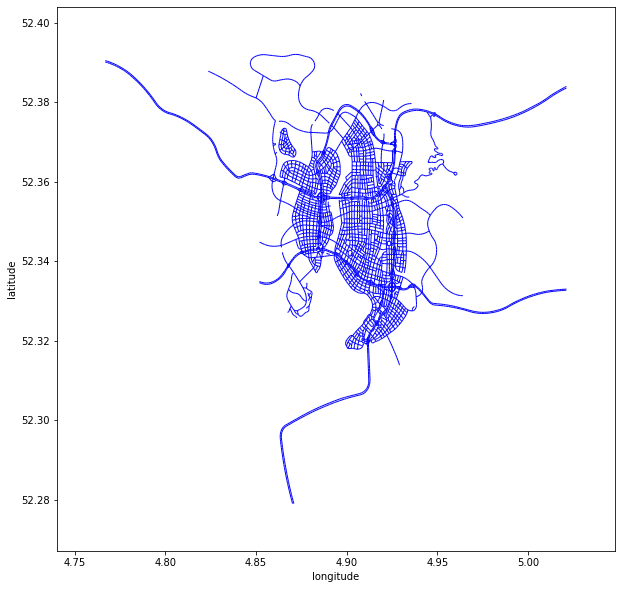

In [8]:
dataset = SHDataset(noise=False)
G1,T1,G2,T2 = dataset.read_snapshots(0)
plot_graph(G1, figsize=(10,10))

### Robustness to Noise

No noise


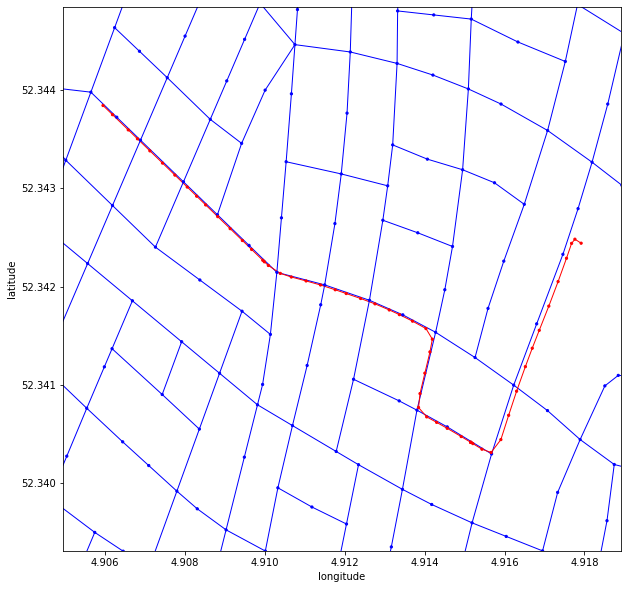

Noise config: 0


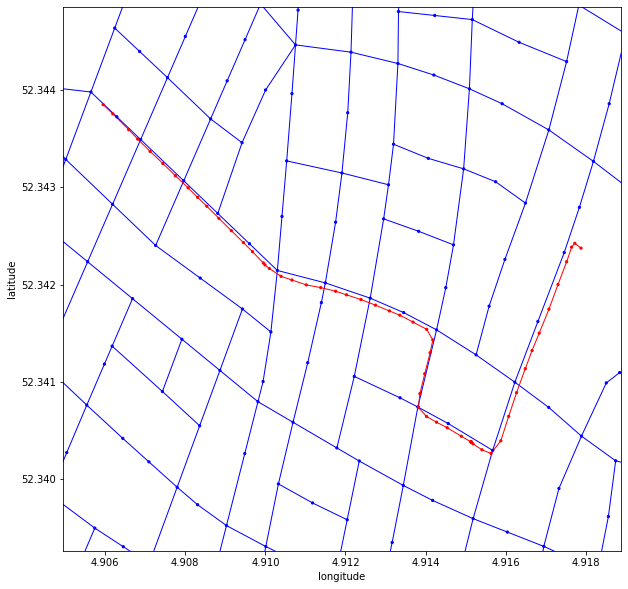

Noise config: 1


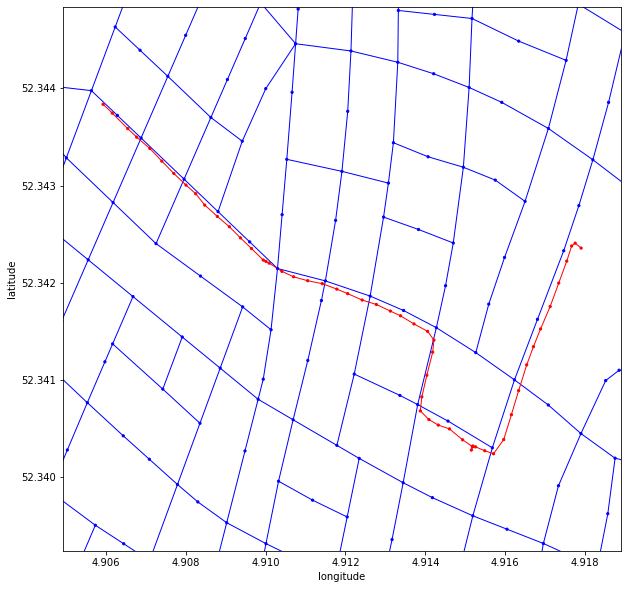

Noise config: 2


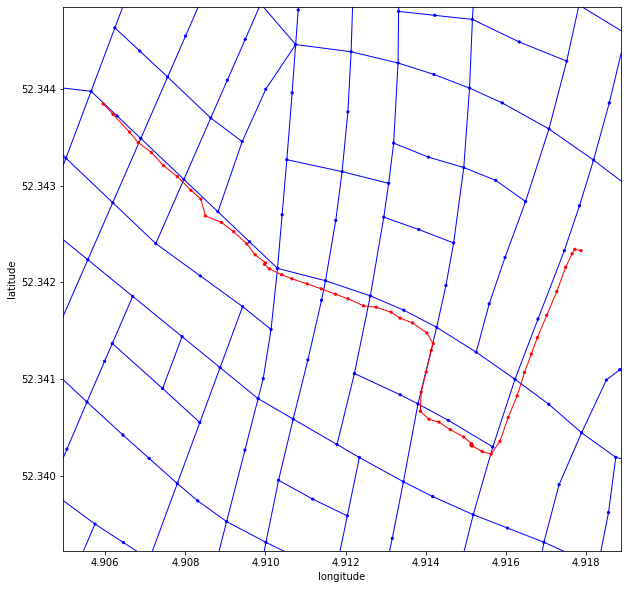

Noise config: 3


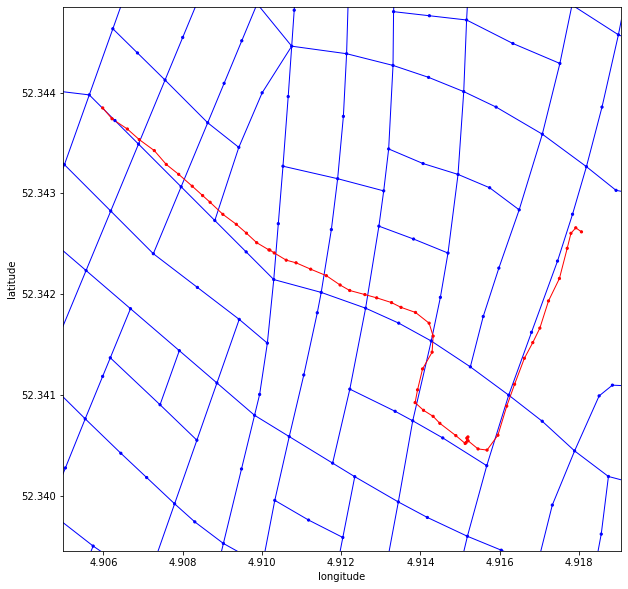

In [37]:
def plot_traj_noise(t_idx=0):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0)
    t = T2['T'][t_idx]
    print('No noise')
    plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, show_nodes=True)
    
    for i in range(4):
        print(f'Noise config: {i}')
        dataset = SHDataset(noise=True, noise_config=i)
        G1,T1,G2,T2 = dataset.read_snapshots(0)
        t = T2['T'][t_idx]
        plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, show_nodes=True)

plot_traj_noise(0)

### Robustness to Trajectory Sparsity

# of trajectories: 5899


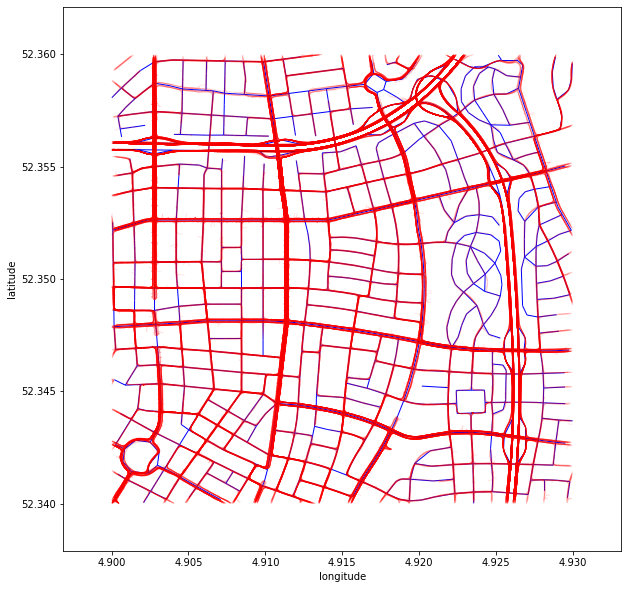

# of trajectories: 11798


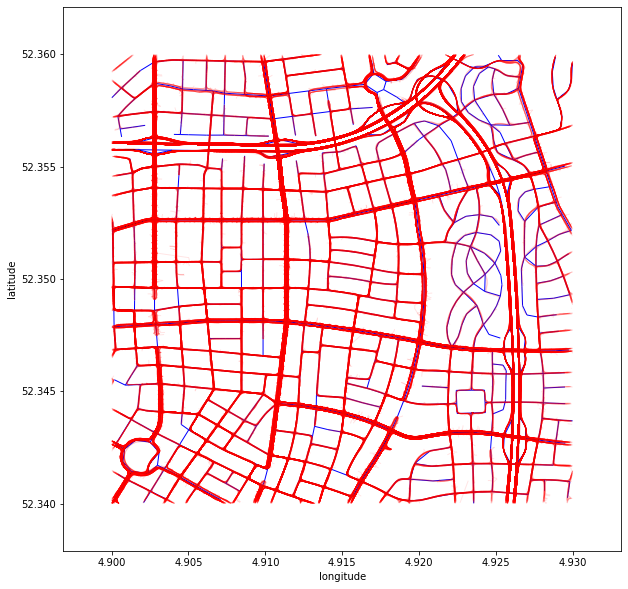

# of trajectories: 17697


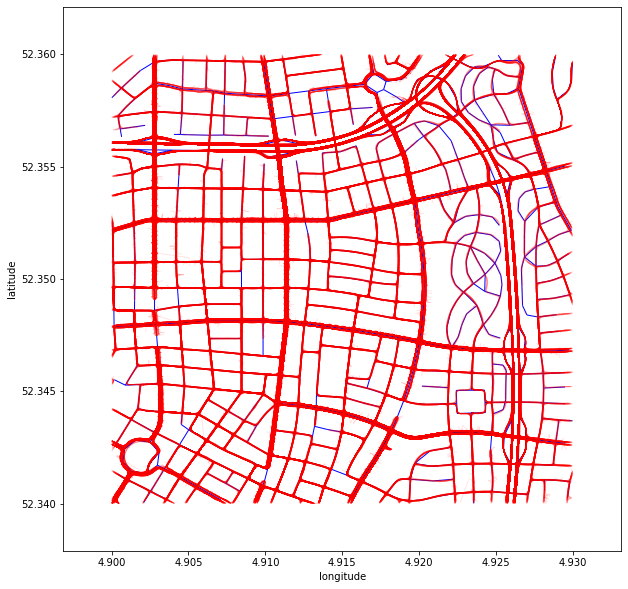

# of trajectories: 23596


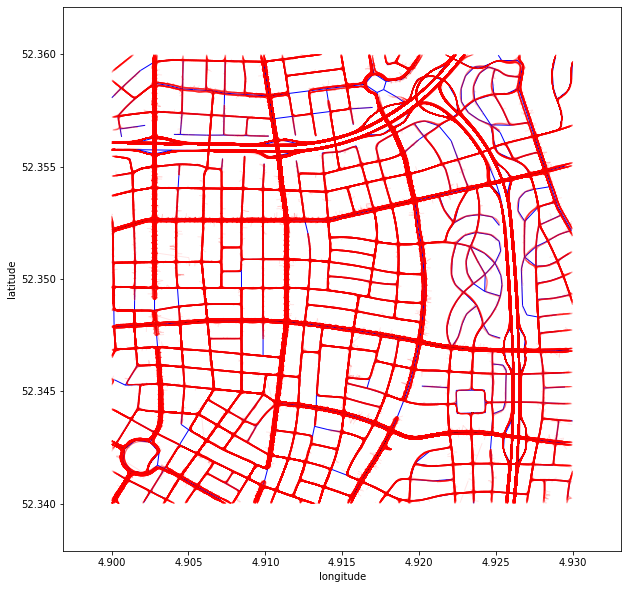

# of trajectories: 29495


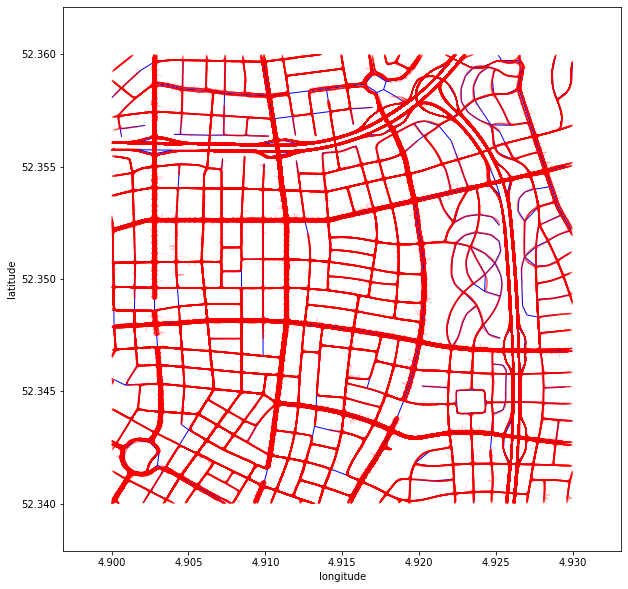

In [36]:
import random

def plot_traj_sparsity(steps=5):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=(52.34,52.36, 4.90, 4.93))
    
    total_t2 = len(T2['T'])
    
    n_traj_steps = np.linspace(0, total_t2, steps+1, dtype=np.int64)[1:]
    for n_traj in n_traj_steps:
        print(f'# of trajectories: {n_traj}')
        T2_ = random.sample(T2['T'], n_traj)
        plot_graph(snapshot_to_nxgraph(G1, T2_), figsize=(10,10), traj_alpha=0.1)

plot_traj_sparsity()

### Robustness to Temporal Sparsity

Resampling every 1 points


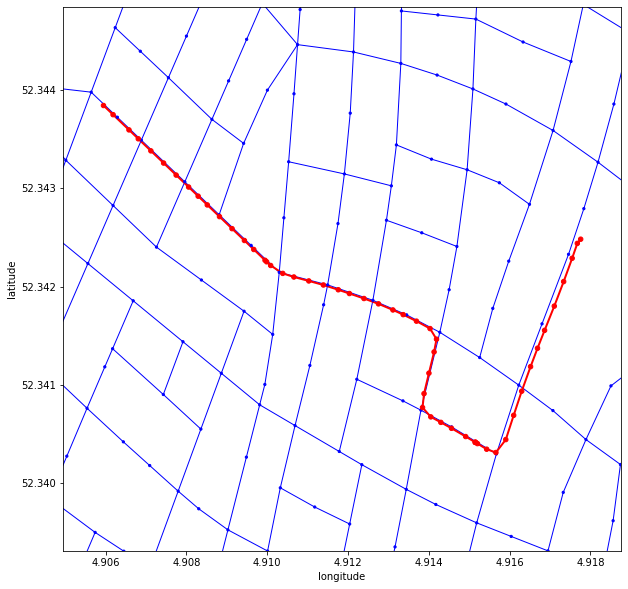

Resampling every 2 points


In [ ]:
def plot_temp_sparsity(t_idx=0, steps=5):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0)
    t = T2['T'][t_idx]
    
    resample_traj_steps = np.arange(1,steps+1)
    
    for resample_everyn in resample_traj_steps:
        print(f'Resampling every {resample_everyn} points')
        t_ = t[0:-1:resample_everyn]
        plot_graph(snapshot_to_nxgraph(G1, [t_]), zoom_on_traj=True, show_nodes=True, T_node_size=20, G_node_size=5, T_edge_width=2.0)
    
plot_temp_sparsity(t_idx=0)